In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [ ]:
# Task №1

In [2]:
def generate_adj_matrix(E = 200, V = 100):

  adj_mat = np.zeros([V,V])

  el_id = np.arange(V * V)
  sequence = []

  for i in range(V):
    for j in range(1 + i, V):
      sequence.append(el_id[i * V + j])

  connections = random.sample(sequence, k = E)

  for i in connections:
    adj_mat[i // V][i % V] = 1
    adj_mat[i % V][i // V] = 1

  return adj_mat

In [3]:
def transfer_to_adj_list(adj_mat):

  adj_list = []

  for array in adj_mat:

    connections = []

    for j in range(len(adj_mat)):
      if array[j] == 1:
        connections.append(j)

    adj_list.append(connections)

  return adj_list

In [4]:
def visualize_graph(adj_mat):

  G = nx.from_numpy_matrix(np.matrix(adj_mat), create_using=nx.MultiGraph)
  nx.draw(G, with_labels=True, alpha=0.6, node_shape='o')
  plt.show()

In [ ]:
# Task №2

In [5]:
class Queue():

  def __init__(self):
    self.queue = []

  def add(self, element):
    self.queue.append(element)

  def remove(self):
    self.queue.pop(0)

  def show(self):
    print(self.queue)

In [6]:
def BFS(adj_list, s):  #s - starting node

  nodes = {}  #0-distance, 1-color, 2-predecessor

  for i in range(len(adj_list)):

    nodes[i] = [0, 'white', None]

  nodes[s][1] = 'gray'

  queue = Queue()
  queue.add(s)

  while len(queue.queue) != 0:

    u = queue.queue[0]  #u-current node
    queue.remove()

    for v in adj_list[u]:

      if nodes[v][1] == 'white':

        nodes[v][1] = 'gray'
        nodes[v][0] = nodes[u][0] + 1
        nodes[v][2] = u

        queue.add(v)

    nodes[u][1] = 'black'

  return nodes

In [7]:
def DFS(adj_list):
  
  nodes = {}  #0-distance, 1-color, 2-predecessor

  for i in range(len(adj_list)):

    nodes[i] = [0, 'white', None]


  time = -1  #Won't be used for the "close" time, onle for "open"


  def DFS_visit(u, time):

    time += 1
    nodes[u][0] = time
    nodes[u][1] = 'gray'

    for v in adj_list[u]:

      if nodes[v][1] == 'white':

        nodes[v][2] = u
        DFS_visit(v, time)

    nodes[u][1] = 'black'
    time += 1


  for u in nodes:

    if nodes[u][1] == 'white':

      DFS_visit(u, time)

  return nodes

In [11]:
adj_mat = generate_adj_matrix()
adj_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
adj_list = transfer_to_adj_list(adj_mat)
adj_list

[[39],
 [12, 73, 80],
 [10, 51, 80, 82, 91],
 [39, 98, 99],
 [54],
 [29, 36, 40, 82, 90],
 [14, 25, 30, 43, 63, 67, 72, 85],
 [43, 48, 72, 91],
 [39, 77],
 [15, 56, 70],
 [2, 54, 73, 74, 95, 99],
 [25, 38, 42, 51, 57],
 [1, 55, 68, 73, 95],
 [38, 67],
 [6],
 [9, 21, 24, 33, 40, 72],
 [88],
 [41, 62],
 [24, 78, 85, 97],
 [28, 72, 75, 85],
 [66, 71],
 [15, 82],
 [29, 50, 57, 94],
 [61, 66, 98],
 [15, 18, 39, 48, 66, 77],
 [6, 11, 33, 39, 43, 64],
 [37, 67],
 [28, 32, 49],
 [19, 27, 64, 66, 95],
 [5, 22],
 [6, 65, 68, 83, 97],
 [54, 84],
 [27, 40, 48, 89, 96],
 [15, 25, 55, 58, 60, 83],
 [56, 60, 90],
 [84],
 [5, 78, 81],
 [26, 40, 87],
 [11, 13, 48, 54, 55],
 [0, 3, 8, 24, 25, 67, 73, 87],
 [5, 15, 32, 37, 53, 56, 73],
 [17, 92, 95, 98],
 [11, 68, 93],
 [6, 7, 25, 73, 82, 84],
 [70, 78, 81, 91],
 [55, 58, 69],
 [50, 67],
 [58],
 [7, 24, 32, 38, 67, 70],
 [27, 64],
 [22, 46, 59, 75, 78],
 [2, 11, 53, 60, 63],
 [55, 58],
 [40, 51, 66, 83],
 [4, 10, 31, 38],
 [12, 33, 38, 45, 52, 75, 77],
 

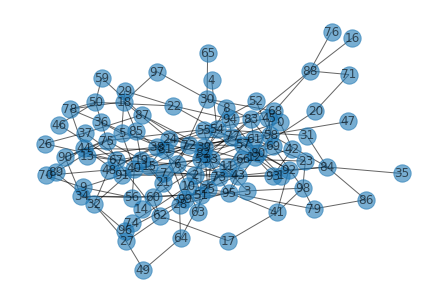

In [13]:
visualize_graph(adj_mat)

In [14]:
BFS(adj_list, 0)  #0-distance, 1-color, 2-predecessor

{0: [0, 'black', None],
 1: [3, 'black', 73],
 2: [4, 'black', 91],
 3: [2, 'black', 39],
 4: [5, 'black', 54],
 5: [4, 'black', 40],
 6: [3, 'black', 25],
 7: [4, 'black', 48],
 8: [2, 'black', 39],
 9: [4, 'black', 15],
 10: [3, 'black', 73],
 11: [3, 'black', 25],
 12: [3, 'black', 73],
 13: [3, 'black', 67],
 14: [4, 'black', 6],
 15: [3, 'black', 24],
 16: [6, 'black', 88],
 17: [4, 'black', 62],
 18: [3, 'black', 24],
 19: [4, 'black', 75],
 20: [4, 'black', 66],
 21: [4, 'black', 15],
 22: [5, 'black', 57],
 23: [4, 'black', 98],
 24: [2, 'black', 39],
 25: [2, 'black', 39],
 26: [3, 'black', 67],
 27: [5, 'black', 32],
 28: [4, 'black', 66],
 29: [5, 'black', 5],
 30: [4, 'black', 6],
 31: [5, 'black', 84],
 32: [4, 'black', 48],
 33: [3, 'black', 25],
 34: [5, 'black', 60],
 35: [5, 'black', 84],
 36: [5, 'black', 81],
 37: [3, 'black', 87],
 38: [4, 'black', 48],
 39: [1, 'black', 0],
 40: [3, 'black', 73],
 41: [4, 'black', 98],
 42: [4, 'black', 11],
 43: [3, 'black', 25],


In [15]:
DFS(adj_list)  #0-distance, 1-color, 2-predecessor

{0: [0, 'black', None],
 1: [29, 'black', 73],
 2: [39, 'black', 51],
 3: [2, 'black', 39],
 4: [42, 'black', 54],
 5: [16, 'black', 40],
 6: [7, 'black', 72],
 7: [26, 'black', 48],
 8: [58, 'black', 77],
 9: [34, 'black', 15],
 10: [40, 'black', 2],
 11: [9, 'black', 25],
 12: [30, 'black', 1],
 13: [11, 'black', 38],
 14: [8, 'black', 6],
 15: [33, 'black', 33],
 16: [52, 'black', 88],
 17: [61, 'black', 41],
 18: [55, 'black', 97],
 19: [21, 'black', 75],
 20: [49, 'black', 66],
 21: [59, 'black', 82],
 22: [18, 'black', 29],
 23: [4, 'black', 98],
 24: [56, 'black', 18],
 25: [8, 'black', 6],
 26: [13, 'black', 67],
 27: [23, 'black', 28],
 28: [22, 'black', 19],
 29: [17, 'black', 5],
 30: [53, 'black', 68],
 31: [42, 'black', 54],
 32: [24, 'black', 27],
 33: [32, 'black', 55],
 34: [36, 'black', 56],
 35: [44, 'black', 84],
 36: [57, 'black', 78],
 37: [14, 'black', 26],
 38: [10, 'black', 11],
 39: [1, 'black', 0],
 40: [15, 'black', 37],
 41: [60, 'black', 95],
 42: [64, 'bla